# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [2]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)


# Your code for tensor
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.float32)


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [3]:
# Create dataloader
# Your code for TensorDataset and dataloader
batchSize = 45

dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

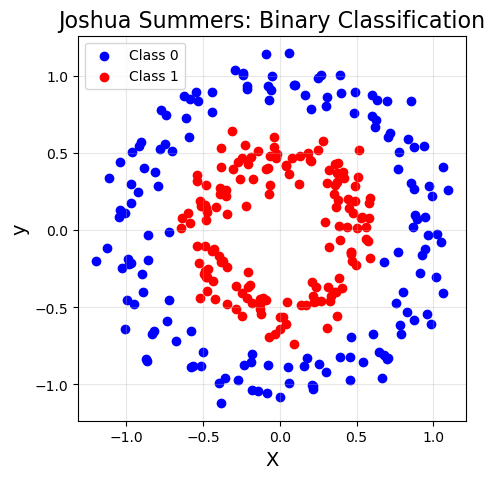

In [4]:
# Plot each class
# Your code plot with scatter
plt.figure(figsize=(5, 5))
plt.scatter(X_t[y_t == 0][:, 0], X_t[y_t == 0][:, 1], color='blue', label="Class 0")
plt.scatter(X_t[y_t == 1][:, 0], X_t[y_t == 1][:, 1], color='red', label="Class 1")

# Add Label and title
plt.title("Joshua Summers: Binary Classification", fontsize=16)
# Your code set graph axises
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(alpha=0.3)
plt.legend(loc="upper left")
plt.show()

We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [5]:
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Your code 
            nn.Linear(input_size, hidden_size),  # input -> hidden layer (FC1)
            nn.ReLU(),                           # Relu Activiation
            nn.Linear(hidden_size, hidden_size), # hidden -> hidden layer (FC2)
            nn.ReLU(),                           # Relu Activiation
            nn.Linear(hidden_size, output_size), # hidden -> output layer (FC3)
            nn.Sigmoid()                         # sigmoid activation function for binary classification
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [6]:
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # losses tracked per epoch
    lossesArray = []

    # Your code
    for epoch in range(epochs):
        losses = 0
        for X, y in dataloader:
            optimizer.zero_grad()           # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()      # Forward pass to get output
            loss = criterion(y_hat, y)      # Calculate loss
            loss.backward()                 # Getting gradients w.r.t. parameters
            optimizer.step()                # Update parameters
            losses += loss.item()           # Add loss for this batch to running total
        # Append to losses Array for return
        lossesArray.append(losses / len(dataloader))
        if verbose: print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
    return lossesArray # return the losses per epoch

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

Let's train the model:

In [7]:
# Your code
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(2, 6, 1)

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [8]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [9]:
summary(model, (2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 6]              18
              ReLU-2                    [-1, 6]               0
            Linear-3                    [-1, 6]              42
              ReLU-4                    [-1, 6]               0
            Linear-5                    [-1, 1]               7
           Sigmoid-6                    [-1, 1]               0
Total params: 67
Trainable params: 67
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [10]:
# build your trainer function with model, criterion, optimizer, dataloader, epochs=30, verbose=True
# Your code
losses = trainer(model, criterion, optimizer, dataloader, epochs=30, verbose=True)

epoch: 1, loss: 0.6913
epoch: 2, loss: 0.6057
epoch: 3, loss: 0.5241
epoch: 4, loss: 0.4956
epoch: 5, loss: 0.4839
epoch: 6, loss: 0.4220
epoch: 7, loss: 0.3251
epoch: 8, loss: 0.2955
epoch: 9, loss: 0.2254
epoch: 10, loss: 0.1840
epoch: 11, loss: 0.1339
epoch: 12, loss: 0.1129
epoch: 13, loss: 0.1058
epoch: 14, loss: 0.0887
epoch: 15, loss: 0.0713
epoch: 16, loss: 0.0667
epoch: 17, loss: 0.0815
epoch: 18, loss: 0.0977
epoch: 19, loss: 0.0810
epoch: 20, loss: 0.0485
epoch: 21, loss: 0.0342
epoch: 22, loss: 0.0311
epoch: 23, loss: 0.0304
epoch: 24, loss: 0.0326
epoch: 25, loss: 0.0273
epoch: 26, loss: 0.0304
epoch: 27, loss: 0.0353
epoch: 28, loss: 0.0370
epoch: 29, loss: 0.0523
epoch: 30, loss: 0.0412


#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

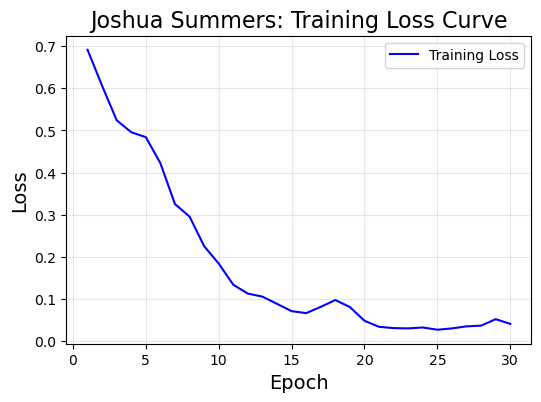

In [11]:
# Your code
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(losses) + 1), losses, label="Training Loss", color="blue")
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.title("Joshua Summers: Training Loss Curve", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

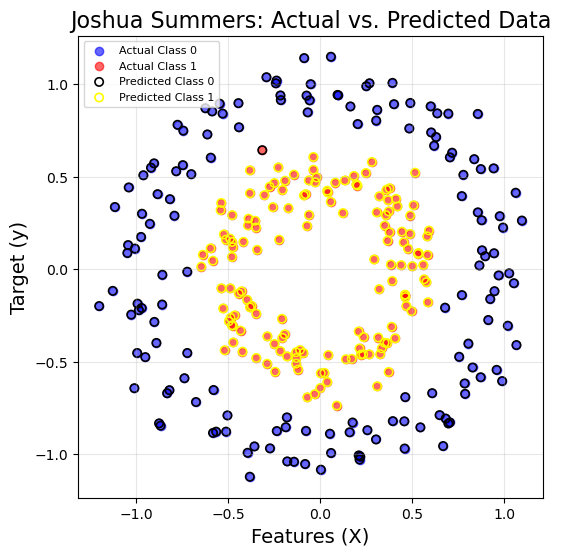

In [12]:
# Your code
# Predictions
with torch.no_grad():
    y_pred = model(X_t)
    y_pred = (y_pred > 0.5).float()
# Plot setup
plt.figure(figsize=(6, 6))
# Actual data
plt.scatter(X_t[y_t == 0][:, 0], X_t[y_t == 0][:, 1], color='blue', label="Actual Class 0", alpha=0.6)
plt.scatter(X_t[y_t == 1][:, 0], X_t[y_t == 1][:, 1], color='red', label="Actual Class 1", alpha=0.6)
# Predicted data
plt.scatter(X_t[y_pred.flatten() == 0][:, 0], X_t[y_pred.flatten() == 0][:, 1], 
            edgecolors='black', facecolors='none', label="Predicted Class 0", linewidth=1.2)
plt.scatter(X_t[y_pred.flatten() == 1][:, 0], X_t[y_pred.flatten() == 1][:, 1], 
            edgecolors='yellow', facecolors='none', label="Predicted Class 1", linewidth=1.2)
# Formatting
plt.xlabel("Features (X)", fontsize=14)
plt.ylabel("Target (y)", fontsize=14)
plt.title("Joshua Summers: Actual vs. Predicted Data", fontsize=16)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.show()

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [13]:
prediction = model(X_t)
print(prediction)

tensor([[9.9044e-01],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [7.0298e-08],
        [9.9269e-01],
        [7.2880e-06],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [1.4053e-09],
        [9.9269e-01],
        [9.9269e-01],
        [6.9829e-03],
        [1.7837e-04],
        [2.7823e-05],
        [1.2450e-02],
        [9.9269e-01],
        [2.9723e-04],
        [6.2932e-11],
        [5.8797e-01],
        [7.3673e-01],
        [2.9338e-04],
        [9.9269e-01],
        [9.8046e-01],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [5.3317e-06],
        [9.2801e-01],
        [8.5028e-05],
        [9.9269e-01],
        [2.0661e-09],
        [8.7124e-01],
        [9.9269e-01],
        [4.7872e-05],
        [1.1019e-07],
        [7.5460e-07],
        [9.9269e-01],
        [9.8481e-01],
        [9.9269e-01],
        [7.6197e-05],
        [9.9269e-01],
        [1.2614e-05],
        [1

In [14]:
# Already in sigmoid form from the model
probability = prediction
print(probability)

tensor([[9.9044e-01],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [7.0298e-08],
        [9.9269e-01],
        [7.2880e-06],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [1.4053e-09],
        [9.9269e-01],
        [9.9269e-01],
        [6.9829e-03],
        [1.7837e-04],
        [2.7823e-05],
        [1.2450e-02],
        [9.9269e-01],
        [2.9723e-04],
        [6.2932e-11],
        [5.8797e-01],
        [7.3673e-01],
        [2.9338e-04],
        [9.9269e-01],
        [9.8046e-01],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [9.9269e-01],
        [5.3317e-06],
        [9.2801e-01],
        [8.5028e-05],
        [9.9269e-01],
        [2.0661e-09],
        [8.7124e-01],
        [9.9269e-01],
        [4.7872e-05],
        [1.1019e-07],
        [7.5460e-07],
        [9.9269e-01],
        [9.8481e-01],
        [9.9269e-01],
        [7.6197e-05],
        [9.9269e-01],
        [1.2614e-05],
        [1

In [15]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [16]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype=torch.float32)
y_t = torch.tensor(y, dtype=torch.long)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

In [17]:
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),  # input -> hidden layer (FC1)
            torch.nn.ReLU(),                           # ReLU Activiation
            torch.nn.Linear(hidden_size, hidden_size), # hidden -> hidden layer (FC2)
            torch.nn.ReLU(),                           # ReLU Activiation
            torch.nn.Linear(hidden_size, output_size) # hidden -> output layer (FC7)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

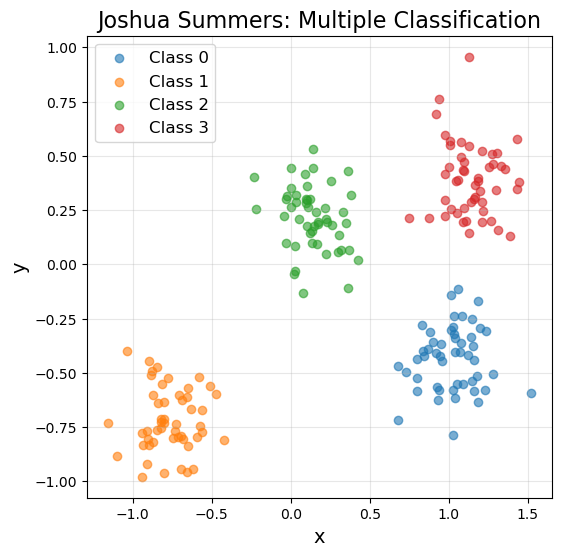

In [18]:
# Plot each class
plt.figure(figsize=(6, 6))
# Your code plot with scatter
for cluster_label in range(4):  # Since we have 4 classifiers
    plt.scatter(X_t[y_t == cluster_label][:, 0], X_t[y_t == cluster_label][:, 1], 
                label=f"Class {cluster_label}", alpha=0.6)
# Your code
plt.title("Joshua Summers: Multiple Classification", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [20]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
# Your code
from torchmetrics.classification import Accuracy
from torchmetrics.classification import AUROC as auroc
import torch.nn.functional as torchFunctions

model_2 = multiClassifier(2, 6, 4)

# Your code 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.2) # optimization algorithm - Adam lr=0.2

# Initialize AUROC metric
auroc_metric = auroc(task="multiclass", num_classes=4)
accuracy_metric = Accuracy(task="multiclass", num_classes=4)

#AUROC lists
loss_record = []
auroc_record = []
accuracy_record = []

for epoch in range(10):
    losses = 0
    all_predictions = []
    all_labels = []
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()               # Clear gradients w.r.t. parameters
        y_hat = model_2(X_batch)            # Forward pass to get output
        loss = criterion(y_hat, y_batch)    # Calculate loss
        loss.backward()                     # Getting gradients w.r.t. parameters
        optimizer.step()                    # Update parameters
        losses += loss.item()               # Add loss for this batch to the running total

        predictions = torch.argmax(y_hat, dim=1)  # Get predicted class
        acc = accuracy_metric(predictions, y_batch)  # Compute accuracy
        
        # Apply softmax to get probabilities
        probs = torchFunctions.softmax(y_hat, dim=1)
        # Convert labels to one-hot encoding
        one_hot_labels = torchFunctions.one_hot(y_batch, num_classes=4).float()
        # Convert back to single dimension for metric calculations
        one_hot_labels = one_hot_labels.argmax(dim=1)
        # Store predictions and labels for AUROC calculation
        all_predictions.append(probs.detach())  # Detach from computation graph
        all_labels.append(one_hot_labels)
    # Accuracy record append
    accuracy_record.append(acc.item()) # Convert tensor to float
    
    # Torch concatenate lists for AUROC computation
    all_predictions = torch.cat(all_predictions)
    all_labels = torch.cat(all_labels)
    
    # Compute multiclass AUROC
    auroc_score = auroc_metric(all_predictions, all_labels)
    # Store loss and AUROC values
    avg_loss = losses / len(dataloader)
    loss_record.append(avg_loss)
    auroc_record.append(auroc_score.item()) # Convert tensor to float
    
    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.4f}, Accuracy: {acc:.4f}, AUROC: {auroc_score:.4f}")
    #print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

Epoch 1, Loss: 1.3193, Accuracy: 0.4500, AUROC: 0.5463
Epoch 2, Loss: 0.9776, Accuracy: 0.7000, AUROC: 0.7973
Epoch 3, Loss: 0.7685, Accuracy: 0.7000, AUROC: 0.9083
Epoch 4, Loss: 0.5680, Accuracy: 0.5500, AUROC: 0.9167
Epoch 5, Loss: 0.4195, Accuracy: 0.9000, AUROC: 0.9163
Epoch 6, Loss: 0.3860, Accuracy: 0.8000, AUROC: 0.9067
Epoch 7, Loss: 0.3656, Accuracy: 0.7500, AUROC: 0.9184
Epoch 8, Loss: 0.3569, Accuracy: 0.7000, AUROC: 0.9226
Epoch 9, Loss: 0.3357, Accuracy: 0.8500, AUROC: 0.9133
Epoch 10, Loss: 0.3457, Accuracy: 0.7000, AUROC: 0.9205


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

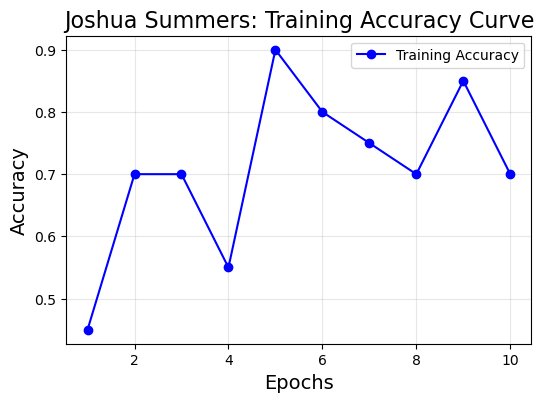

In [21]:
# Your code
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), accuracy_record, marker='o', linestyle='-', color='b', label="Training Accuracy")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Joshua Summers: Training Accuracy Curve", fontsize=16)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

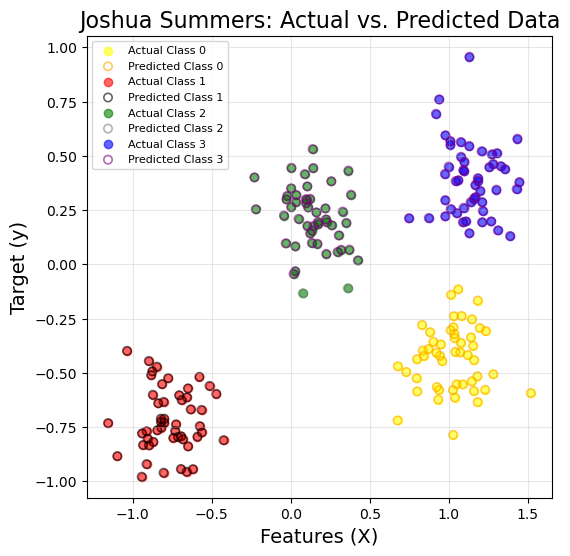

In [22]:
# Your code
# Colors for the plot
original_colors = ['red', 'green', 'blue', 'yellow']
predicted_colors = ['black', 'grey', 'purple', 'orange']

# Predictions
with torch.no_grad():
    y_pred = model_2(X_t)
    y_pred = y_pred.argmax(dim=1) # Resize dimensions to strip off classes
    
# Plot setup
plt.figure(figsize=(6, 6))
# Your code plot with scatter
for cluster_label in range(4):  # Since we have 4 classifiers
    plt.scatter(X_t[y_t == cluster_label][:, 0], X_t[y_t == cluster_label][:, 1], 
                label=f"Actual Class {cluster_label}", alpha=0.6, facecolors=original_colors[cluster_label - 1])
    plt.scatter(X_t[y_pred == cluster_label][:, 0], X_t[y_pred == cluster_label][:, 1], 
                label=f"Predicted Class {cluster_label}", alpha=0.6, edgecolors=predicted_colors[cluster_label - 1],
                facecolors="none", linewidth=1.2)
# Formatting
plt.xlabel("Features (X)", fontsize=14)
plt.ylabel("Target (y)", fontsize=14)
plt.title("Joshua Summers: Actual vs. Predicted Data", fontsize=16)
plt.legend(fontsize=8)
plt.grid(alpha=0.3)
plt.show()